In [402]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [403]:
# experiment = mlflow.create_experiment(name="Getting Data Information")

In [404]:
# run = mlflow.start_run(experiment_id=experiment)

In [405]:
# mlflow.log_artifact("data/mushrooms.csv")

In [406]:
data = pd.read_csv("data/mushrooms.csv")

In [407]:
data.shape

(8124, 23)

In [408]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [409]:
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [410]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [411]:
# for column in data:
#     mlflow.log_param(column, data[column].unique())

In [412]:
# mlflow.log_param("train_test_split", False)

In [413]:
# mlflow.end_run()

In [414]:
# experiment_data_visualization = mlflow.create_experiment(name="Data Visualization")

In [415]:
# run_data_visualization = mlflow.start_run(experiment_id=experiment_data_visualization)

In [416]:
data['class'] = data['class'].apply(lambda x:'Edible' if 'e' in x else 'Poisonous')

In [417]:
custom_palette = ['#FF1493', '#4169E1']  

In [418]:
def plot_feature_vs_class(features: dict):
    for feature, names in features.items():
        plt.figure(figsize=(8, 6))
        count_plot = sns.countplot(x=feature, hue='class', data=data, palette=custom_palette)
        
        current_ticks = count_plot.get_xticks()
        count_plot.set_xticks(current_ticks)
        count_plot.set_xticklabels(names)
        
        for plot_container in count_plot.containers:
            count_plot.bar_label(plot_container, label_type='edge', color='black')
        
        plt.title(f'{feature} vs. Mushroom Class', fontsize=14, fontweight='bold', color='green')
        plt.xlabel(feature, fontsize=12, fontweight='bold', color='green')
        plt.ylabel('Count', fontsize=12, fontweight='bold', color='green')
        plt.xticks(rotation=45)
    
        figure = count_plot.get_figure()
        figure.savefig(f'{feature}_vs_class.png')
    plt.tight_layout()
    plt.show()

In [419]:
features_dict = {
    'class': ('Edible', 'Poisonous'),
    'bruises': ('Bruises', 'No Bruises'),
    'cap-shape': ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical'),
    'cap-surface': ('fibrous', 'grooves', 'scaly', 'smooth'),
    'cap-color': ('brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple', 'red', 'white', 'yellow'),
    'odor': ('almond', 'anise', 'creosote', 'fishy', 'foul', 'musty', 'none', 'pungent', 'spicy'),
    'gill-attachment': ('attached', 'free'),
    'gill-spacing': ('close', 'crowded'),
    'gill-size': ('broad', 'narrow'),
    'gill-color': ('black', 'brown', 'buff', 'chocolate', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow'),
    'stalk-shape': ('enlarging', 'tapering'),
    'stalk-root': ('bulbous', 'club', 'equal', 'rooted', 'missing'),
    'ring-number': ('none', 'one', 'two'),
    'population': ('abundant', 'clustered', 'numerous', 'scattered', 'several', 'solitary'),
    'habitat': ('grasses', 'leaves', 'meadows', 'paths', 'urban', 'waste', 'woods')
}

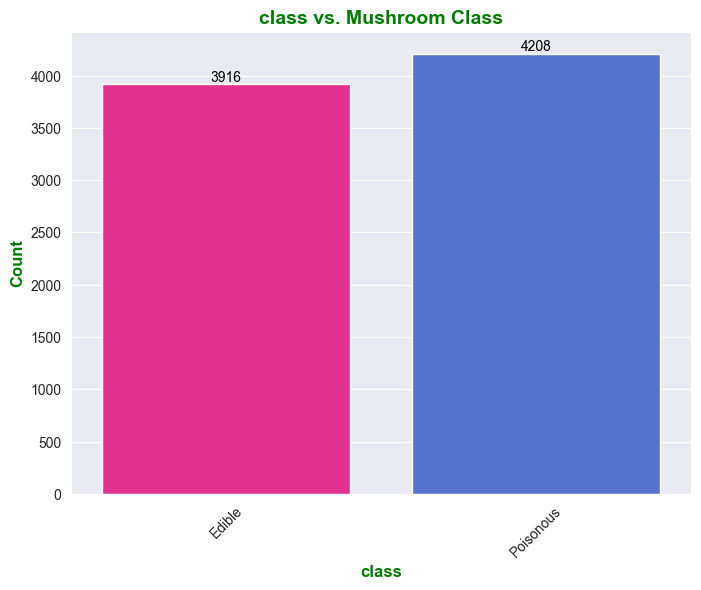

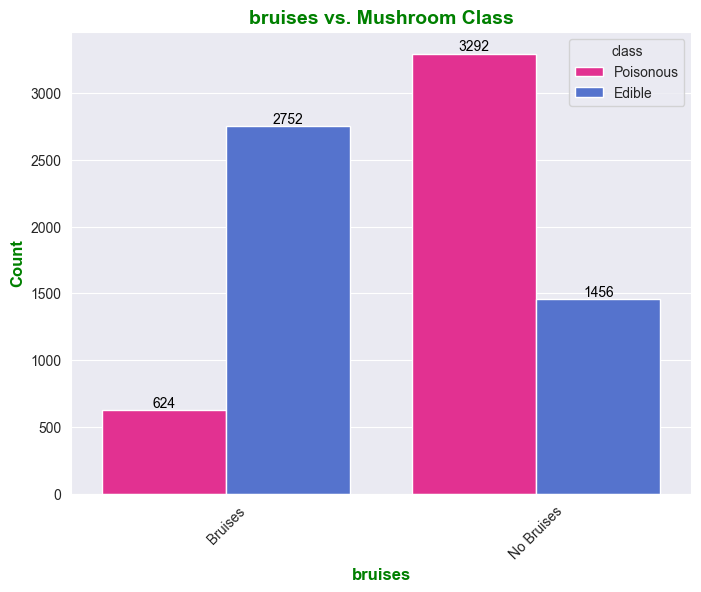

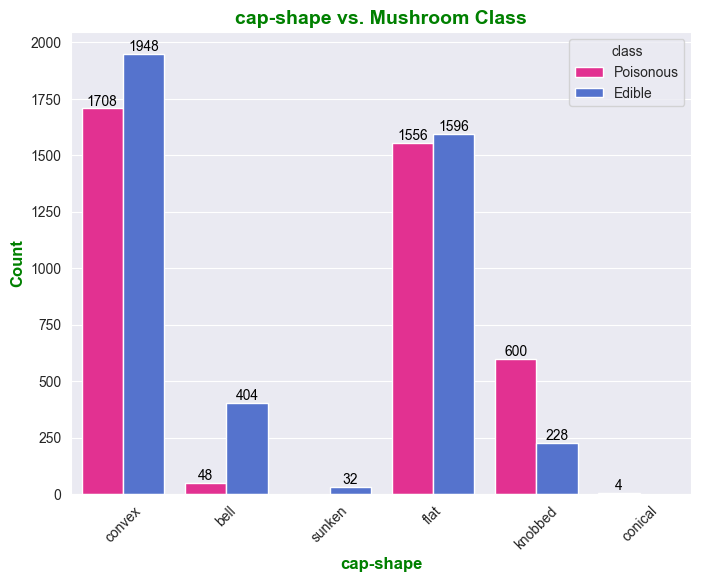

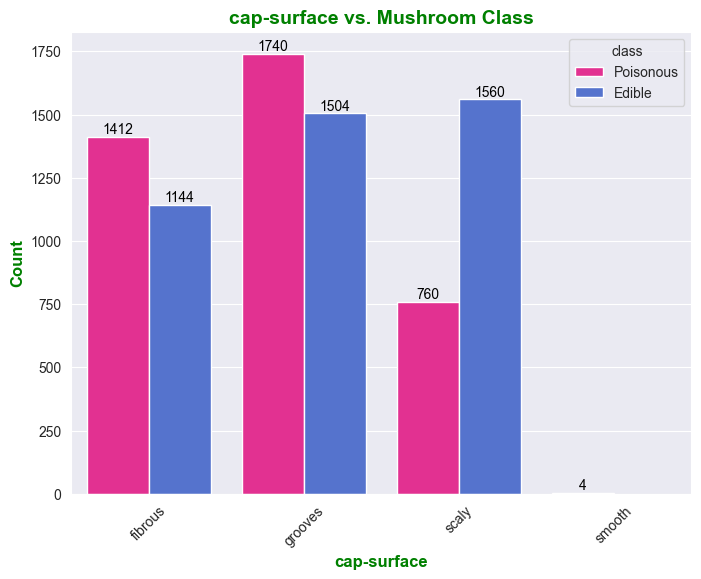

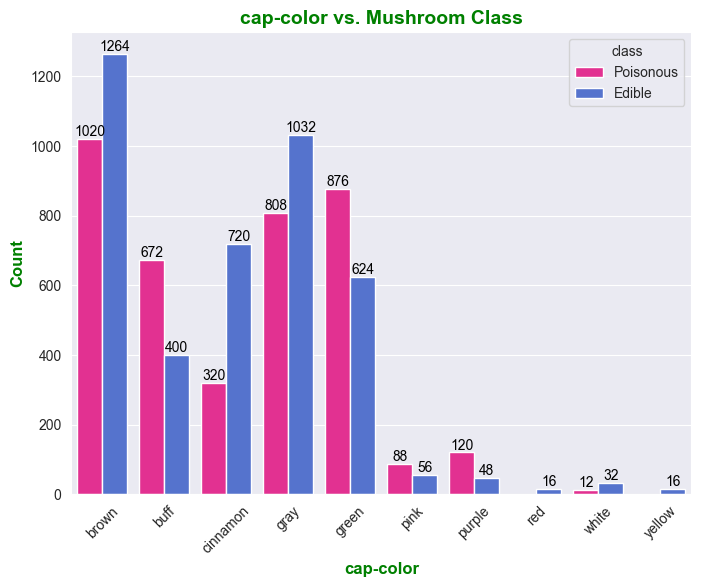

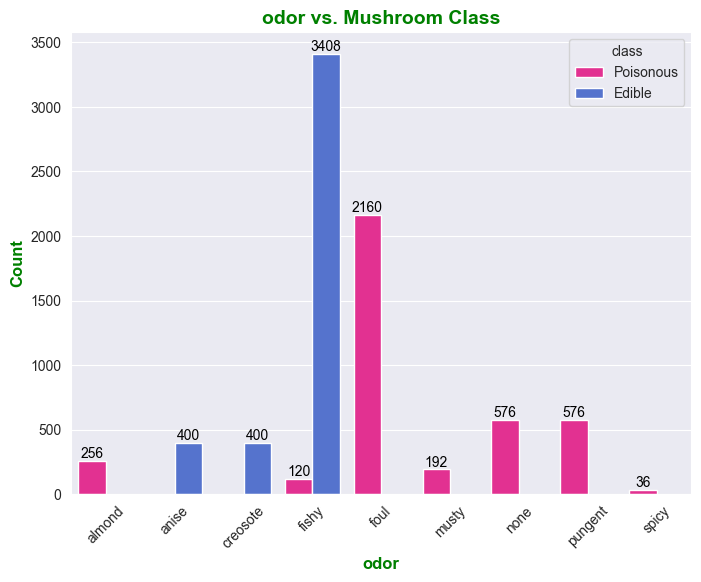

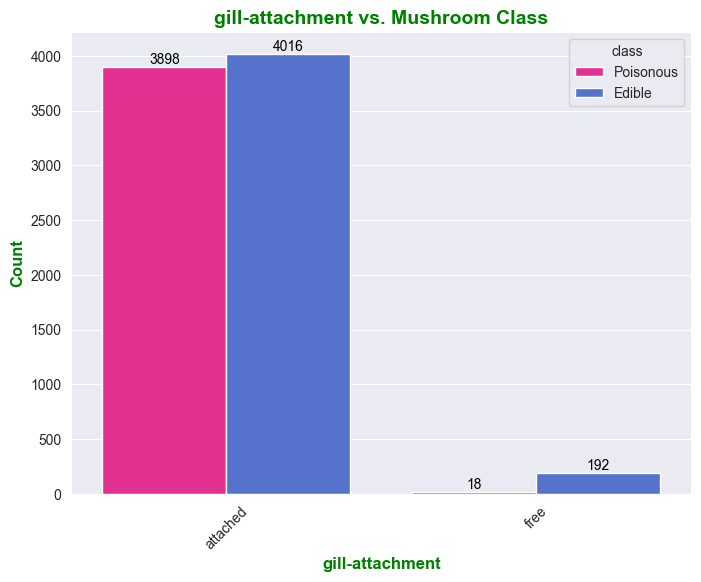

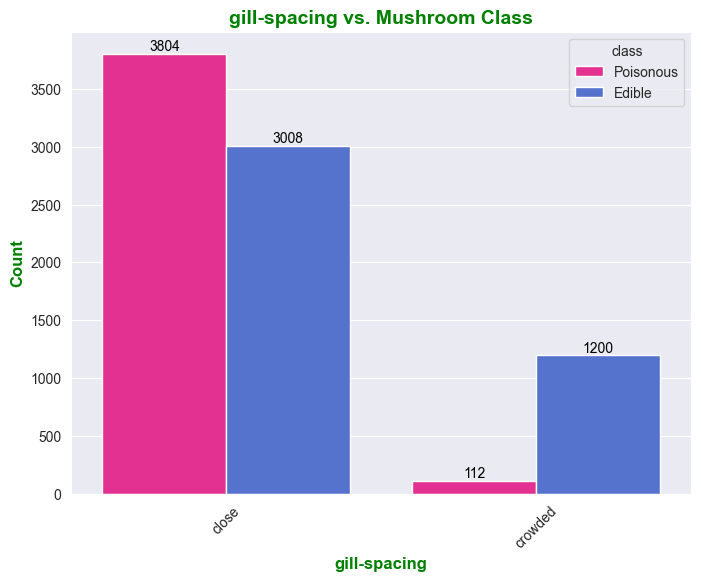

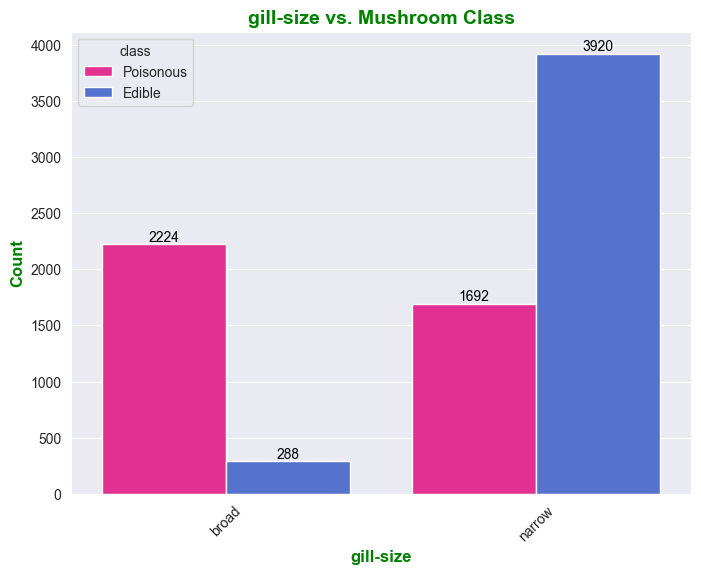

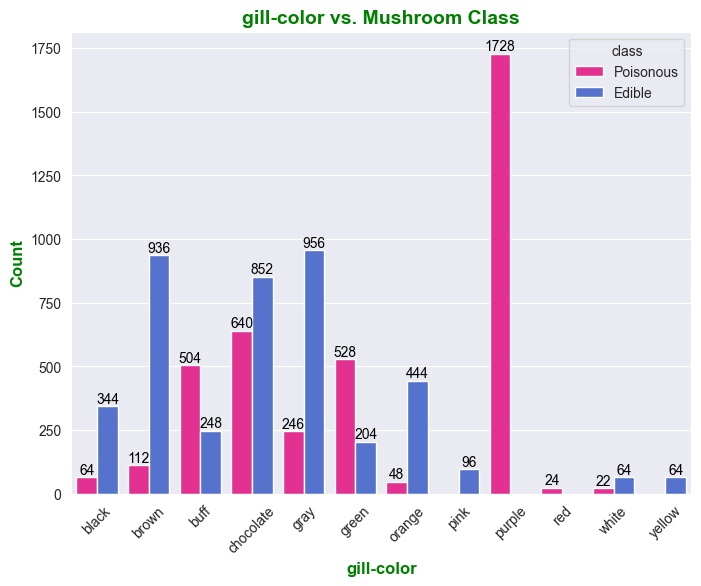

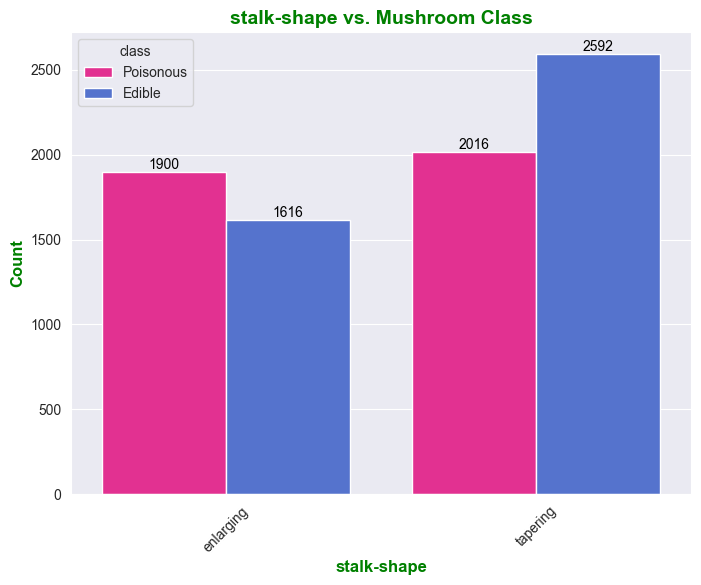

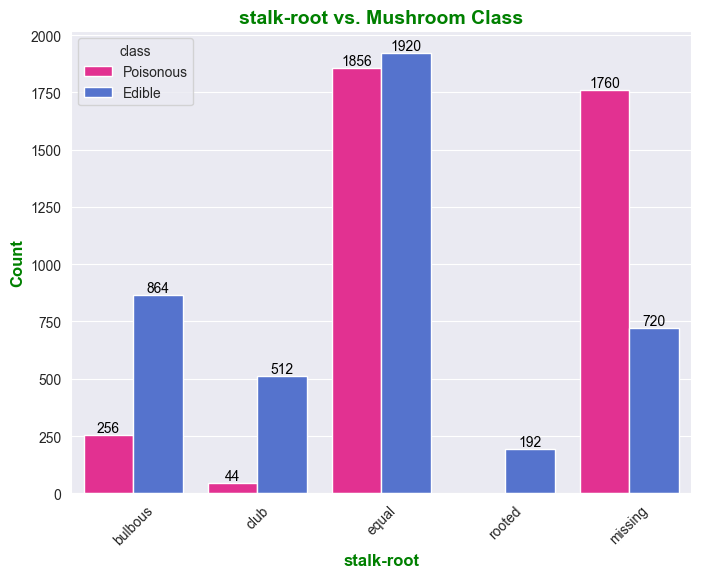

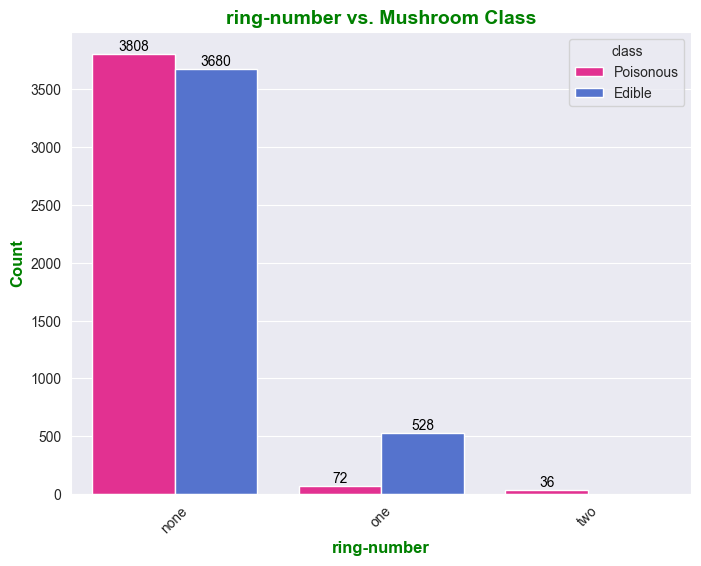

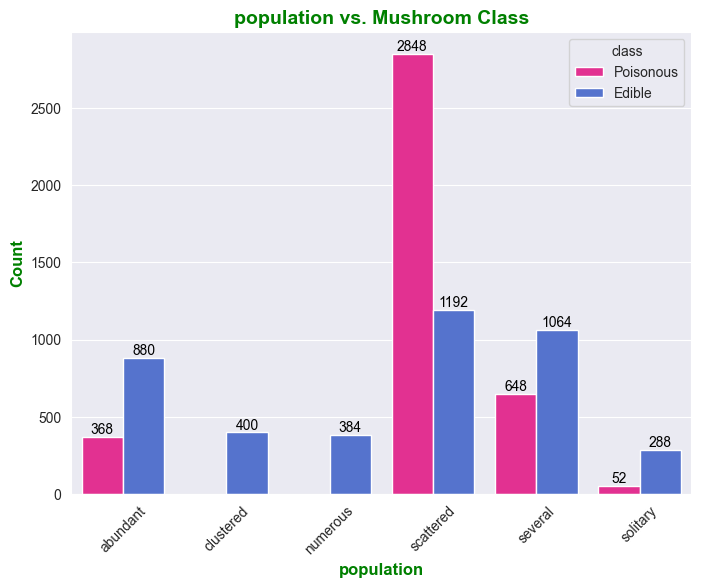

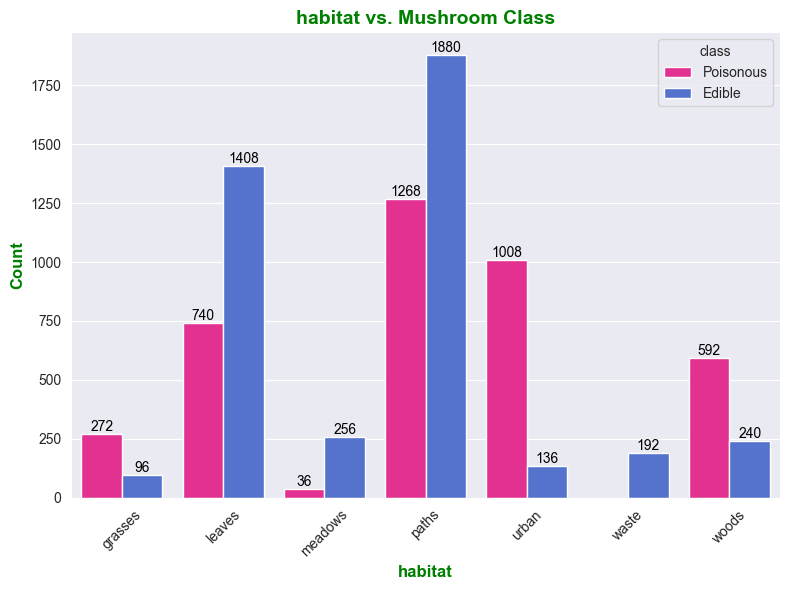

In [420]:
data['stalk-root'] = data['stalk-root'].apply(lambda x: 'm' if '?' in x else x)
plot_feature_vs_class(features=features_dict)

In [421]:
# mlflow.log_artifact("data_visualization")

In [454]:
# mlflow.end_run()

MlflowException: The run 5f997a04f84047ca870cab7bc515048b must be in 'active' lifecycle_stage.

In [455]:
experiment_feature_engineering = mlflow.create_experiment(name="Feature Engineering")

In [456]:
run_data_visualization = mlflow.start_run(experiment_id=experiment_feature_engineering)

In [457]:
def handle_non_standard_values(value: str, standard_values: list):
    if value not in standard_values:
        return 'Others'
    return value

In [458]:
data['cap-shape'].value_counts()

cap-shape
x         3656
f         3152
k          828
Others     488
Name: count, dtype: int64

In [459]:
data['cap-shape'] = data['cap-shape'].apply(lambda x: handle_non_standard_values(x, ['x', 'f', 'k']))

In [460]:
mlflow.log_param('cap-shape', data['cap-shape'].value_counts())

cap-shape
x         3656
f         3152
k          828
Others     488
Name: count, dtype: int64

In [461]:
data['cap-surface'].value_counts()

cap-surface
y         3244
s         2556
Others    2324
Name: count, dtype: int64

In [462]:
data['cap-surface'] = data['cap-surface'].apply(lambda x: handle_non_standard_values(x, ['y', 's']))

In [463]:
mlflow.log_param('cap-surface', data['cap-surface'].value_counts())

cap-surface
y         3244
s         2556
Others    2324
Name: count, dtype: int64

In [464]:
data['cap-color'].value_counts()

cap-color
n         2284
g         1840
e         1500
y         1072
w         1040
Others     388
Name: count, dtype: int64

In [465]:
data['cap-color'] = data['cap-color'].apply(lambda x: handle_non_standard_values(x, ['n', 'g', 'e', 'y', 'w']))

In [466]:
mlflow.log_param('cap-color', data['cap-color'].value_counts())

cap-color
n         2284
g         1840
e         1500
y         1072
w         1040
Others     388
Name: count, dtype: int64

In [467]:
data['odor'].value_counts()

odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

In [468]:
data['odor'] = data['odor'].apply(lambda x: handle_non_standard_values(x, ['n','f','y','s']))

In [469]:
mlflow.log_param('odor', data['odor'].value_counts())

odor
n         3528
f         2160
Others    1284
y          576
s          576
Name: count, dtype: int64

In [470]:
data['gill-color'].value_counts()

gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64

In [471]:
data['gill-color'] = data['gill-color'].apply(lambda x: handle_non_standard_values(x, ['b','p','w','n','g','h','u','k']))

In [472]:
mlflow.log_param('gill-color', data['gill-color'].value_counts())

gill-color
b         1728
p         1492
w         1202
n         1048
g          752
h          732
u          492
k          408
Others     270
Name: count, dtype: int64

In [473]:
data['spore-print-color'].value_counts()

spore-print-color
w    2388
n    1968
k    1872
h    1632
r      72
u      48
o      48
y      48
b      48
Name: count, dtype: int64

In [474]:
data['spore-print-color'] = data['spore-print-color'].apply(lambda x: handle_non_standard_values(x, ['w','n','k','h']))

In [475]:
mlflow.log_param('spore-print-color', data['spore-print-color'].value_counts())

spore-print-color
w         2388
n         1968
k         1872
h         1632
Others     264
Name: count, dtype: int64

In [476]:
data['stalk-color-above-ring'].value_counts()

stalk-color-above-ring
w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: count, dtype: int64

In [477]:
data['stalk-color-above-ring'] = data['stalk-color-above-ring'].apply(lambda x: handle_non_standard_values(x, ['w','p','g','n', 'b']))

In [478]:
mlflow.log_param('stalk-color-above-ring', data['stalk-color-above-ring'].value_counts())

stalk-color-above-ring
w         4464
p         1872
g          576
n          448
b          432
Others     332
Name: count, dtype: int64

In [479]:
data['stalk-color-below-ring'].value_counts()

stalk-color-below-ring
w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: count, dtype: int64

In [480]:
data['stalk-color-below-ring'] = data['stalk-color-below-ring'].apply(lambda x: handle_non_standard_values(x, ['w','p','g','n', 'b']))

In [481]:
mlflow.log_param('stalk-color-below-ring', data['stalk-color-below-ring'].value_counts())

stalk-color-below-ring
w         4384
p         1872
g          576
n          512
b          432
Others     348
Name: count, dtype: int64

In [482]:
mlflow.end_run()

In [ ]:
data['habitat'].value_counts()

In [ ]:
data['population'].value_counts()

In [ ]:
data['ring-type'].value_counts()